# Experiment 5: 多项式回归中的偏差-方差权衡

目标：利用Monte Carlo采样对多项式回归中的偏差，方差进行数值研究

In [64]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline##pipeline是用来简化机器学习工作流的工具
from sklearn.preprocessing import StandardScaler, PolynomialFeatures##数据标准化和多项式特征生成
from sklearn.linear_model import LinearRegression, Ridge##线性回归和岭回归（L2正则化）
from sklearn.metrics import mean_squared_error##均方误差评估指标

np.random.seed(0)

In [65]:
def f_true(x):
    return np.sin(2*np.pi*x)

In [66]:
def generate_dataset(n_samples,noise_std,rng):
    ##n_samples为样本数量，noise_std为噪声标准差，rng为随机数生成器
    X = rng.uniform(0,1,size=n_samples)
    ##在0到1之间均匀采样n_samples个点作为输入特征
    y = f_true(X) + rng.normal(0,noise_std,size=n_samples)
    ##计算对应的目标值，并添加高斯噪声，噪声均值为0，标准差为noise_std
    return X.reshape(-1,1), y
    ##输入特征被重塑为二维数组以符合scikit-learn的要求

In [67]:
rng_test=np.random.default_rng(0)##0为随机数种子
X_test=np.linspace(0,1,100).reshape(-1,1)##在0到1之间生成100个均匀分布的测试点
y_test_true=f_true(X_test).ravel()##计算测试点的真实目标值，并展平为一维数组
##X_test,y_test_true

In [68]:
def make_poly_model(degree,model_type="linear",alpha=None):
    if model_type=="linear":
        reg=LinearRegression()
    elif model_type=="ridge":
        reg=Ridge(alpha=alpha)
    else:
        raise ValueError("Unsupported model_type")
    
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
        ("scaler", StandardScaler()),
        ("regressor", reg)
    ])

In [69]:
n_trials=100##实验重复次数
n_train=20##训练样本数量
noise_std=0.1##噪声标准差
degree=9
rng=np.random.default_rng(0)##随机数生成器

predictions=[]##存储每次实验的预测结果

for i in range(n_trials):
    X_train,y_train=generate_dataset(n_train,noise_std,rng)
    ##生成训练数据集

    model=make_poly_model(degree=degree,model_type="linear",)
    ##创建多项式线性回归模型
    model.fit(X_train,y_train)
    ##训练模型

    y_pred=model.predict(X_test)
    ##在测试集上进行预测
    predictions.append(y_pred)
    ##将预测结果添加到列表中

predictions=np.array(predictions)##转换为NumPy数组以便后续处理

In [70]:
mean_prediction=predictions.mean(axis=0)##计算每个测试点的平均预测值,
##axis=0表示沿着第一个轴（即不同实验的维度）计算均值

bias_sq=np.mean((mean_prediction-y_test_true)**2)##计算偏差平方，衡量平均预测值与真实值之间的差异
variance=np.mean((predictions-mean_prediction)**2)##计算方差，衡量预测值的波动性
noise=noise_std**2##噪声的方差，即噪声标准差的平方
mse=bias_sq+variance+noise##总均方误差

bias_sq, variance, noise, mse

(np.float64(3.1340710232152094),
 np.float64(181.31928339018313),
 0.010000000000000002,
 np.float64(184.46335441339832))

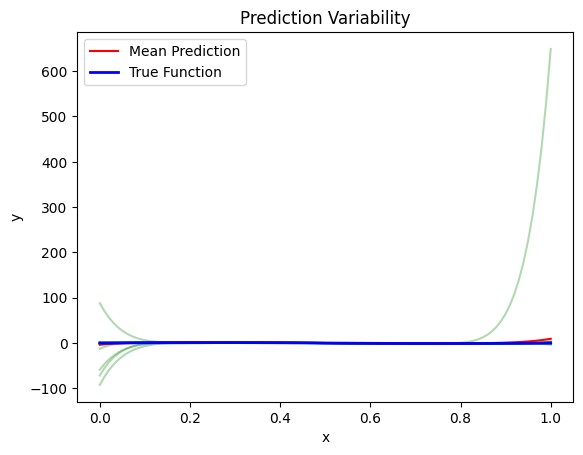

In [71]:
plt.figure()
for i in range(n_train):
    plt.plot(X_test, predictions[i], color='green', alpha=0.3)

plt.plot(X_test, mean_prediction, color='red', label='Mean Prediction')
plt.plot(X_test, y_test_true, color='blue', label='True Function',linewidth=2)

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Prediction Variability")
plt.show()

In [72]:
degree=[1,3,5,9,15]
bias_list=[]
var_list=[]

for d in degree:
    preds=[]
    
    for i in range(n_trials):
        X_train,y_train=generate_dataset(n_train,noise_std,rng)
        model=make_poly_model(degree=d,model_type="linear",)
        model.fit(X_train,y_train)

        y_pred=model.predict(X_test)###在测试集上进行预测
        preds.append(y_pred)###将预测结果添加到列表中

    preds=np.array(preds)##转换为NumPy数组以便后续处理
    mean_pred=preds.mean(axis=0)##计算每个测试点的平均预测值

    bias_list.append(np.mean((mean_pred-y_test_true)**2))##计算偏差平方
    var_list.append(np.mean((preds-mean_pred)**2))##计算方差

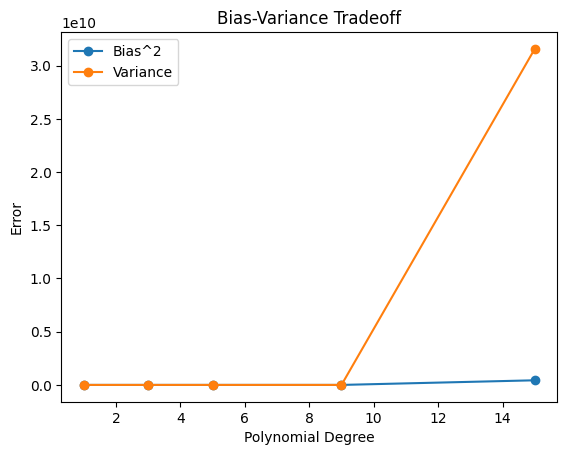

In [73]:
plt.figure()
plt.plot(degree, bias_list, marker='o', label='Bias^2')
plt.plot(degree, var_list, marker='o', label='Variance')
plt.xlabel('Polynomial Degree')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.show()